<a href="https://colab.research.google.com/github/gracebrazil28/Tensorflow_Colab_Notebooks/blob/main/Red_Wine_Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dependencies like tenserflow keras, pandas and io to import our red wine csv

In [ ]:
#Run Once
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import io

from google.colab import files
uploaded = files.upload()

Saving red-wine.csv to red-wine.csv


Save dataset to a pandas dataframe

In [ ]:
red_wine = pd.read_csv(io.BytesIO(uploaded['red-wine.csv']))
red_wine = red_wine.dropna() #clean up
red_wine.head()
#red_wine.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Create Model with three hidden layers with [512, 256, 10] nodes and final output layer of 1 node. Our Activation Function is the Rectifier Linear Function(ReLU) to activate the neurons.

Applied Dropout is applied to avoid overfitting, this is where a fraction of a layer's input units are dropped out to break out conspiracies. Also, batch normalization is used so that the values will be normalized to avoid unstable training behavior.

In [ ]:
model = keras.Sequential([
    layers.Dense(units=512, activation= 'relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=512, activation= 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=512, activation= 'relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
])

#w, b = model.weights


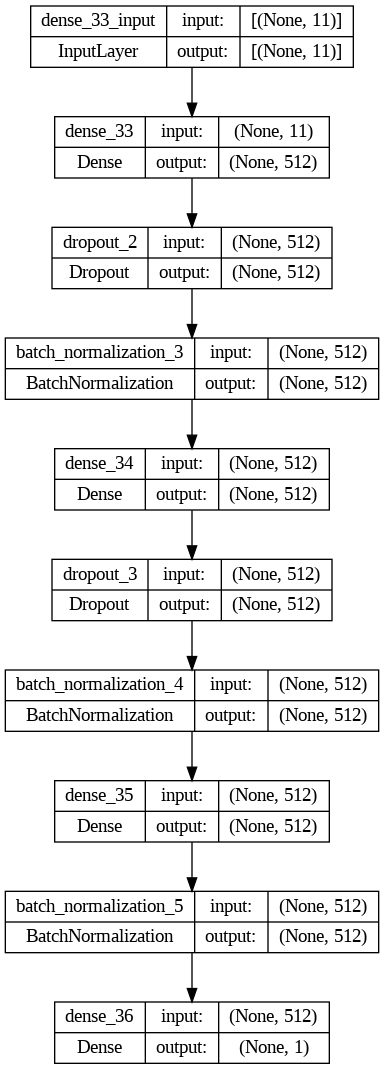

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True)

Loss Function: Mean Absolute Error,
Optimizer: Stochastic Gradient Descent (SGD) - Adaptive Moment Estimation (aka adam)

In [ ]:
model.compile(optimizer='adam',
              loss = 'mae')

Epoch 1/20
5/5 [==============================] - 3s 102ms/step - loss: 5.5887 - val_loss: 5.8173
Epoch 2/20
5/5 [==============================] - 0s 45ms/step - loss: 5.4245 - val_loss: 4.5390
Epoch 3/20
5/5 [==============================] - 0s 56ms/step - loss: 5.2454 - val_loss: 2.8830
Epoch 4/20
5/5 [==============================] - 0s 83ms/step - loss: 5.0590 - val_loss: 3.4666
Epoch 5/20
5/5 [==============================] - 0s 72ms/step - loss: 4.8473 - val_loss: 7.1572
Epoch 6/20
5/5 [==============================] - 0s 79ms/step - loss: 4.6186 - val_loss: 3.8693
Epoch 7/20
5/5 [==============================] - 0s 68ms/step - loss: 4.3283 - val_loss: 7.3313
Epoch 8/20
5/5 [==============================] - 0s 79ms/step - loss: 4.0342 - val_loss: 4.8429
Epoch 9/20
5/5 [==============================] - 0s 80ms/step - loss: 3.7008 - val_loss: 4.4949
Epoch 10/20
5/5 [==============================] - 0s 87ms/step - loss: 3.3545 - val_loss: 2.9920
Epoch 11/20
5/5 [===========

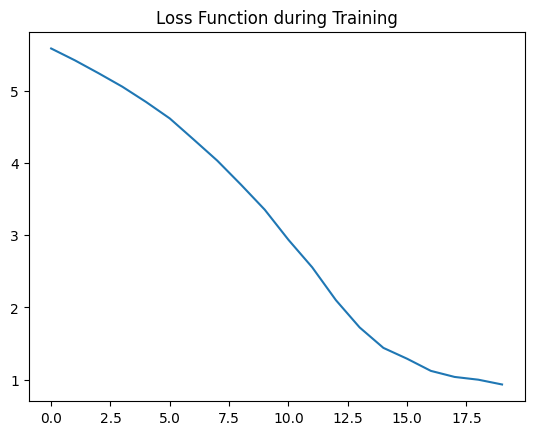

In [ ]:
# Define Target and Features
y = red_wine.quality
features = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
x = red_wine[features]

# Split into training and validation samples
from sklearn.model_selection import train_test_split
train_x, validate_x, train_y, validate_y = train_test_split(x, y, random_state=1)

#model.summary()
train_x.shape

#Create training History during model fitting
history = model.fit(
    train_x, train_y,
    validation_data=(validate_x, validate_y),
    batch_size=256,
    epochs=20,
)

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot(title="Loss Function during Training");

Adding Early stopping and callbacks. Early stopping condition: If there hasn't been atleast an improvement of 0.001 in the validation loss over the previous 5 epochs, stop the training and keep the best weights/model.

Epoch 1/20
5/5 [==============================] - 0s 73ms/step - loss: 0.8565 - val_loss: 0.7592
Epoch 2/20
5/5 [==============================] - 0s 63ms/step - loss: 0.8209 - val_loss: 0.9279
Epoch 3/20
5/5 [==============================] - 0s 46ms/step - loss: 0.8136 - val_loss: 1.1891
Epoch 4/20
5/5 [==============================] - 0s 48ms/step - loss: 0.7850 - val_loss: 0.8430
Epoch 5/20
5/5 [==============================] - 0s 52ms/step - loss: 0.7353 - val_loss: 0.6985
Epoch 6/20
5/5 [==============================] - 0s 44ms/step - loss: 0.7357 - val_loss: 0.8040
Epoch 7/20
5/5 [==============================] - 0s 47ms/step - loss: 0.7625 - val_loss: 0.9214
Epoch 8/20
5/5 [==============================] - 0s 49ms/step - loss: 0.7053 - val_loss: 0.6229
Epoch 9/20
5/5 [==============================] - 0s 48ms/step - loss: 0.7025 - val_loss: 0.6980
Epoch 10/20
5/5 [==============================] - 0s 45ms/step - loss: 0.6768 - val_loss: 0.8061
Epoch 11/20
5/5 [============

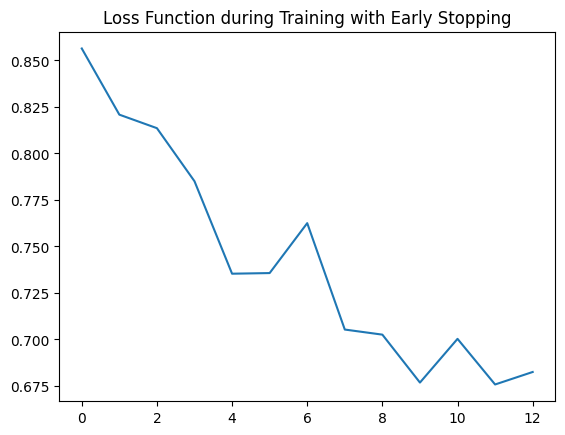

In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True
)


new_history = model.fit(
    train_x, train_y,
    validation_data=(validate_x, validate_y),
    batch_size=256,
    epochs=20,
    callbacks=[early_stopping]
)

# convert the training history to a dataframe
new_history_df = pd.DataFrame(new_history.history)
# use Pandas native plot method
new_history_df['loss'].plot(title="Loss Function during Training with Early Stopping");